CLASSIFY IRIS FLOWERS

Use the famous Iris dataset to build a model that can classify iris flowers based on their sepal and petal dimensions.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Load the iris dataset

In [ ]:
iris=datasets.load_iris()
X = iris.data[:, :4]
y= iris.target

#Visualize the dataset before training model

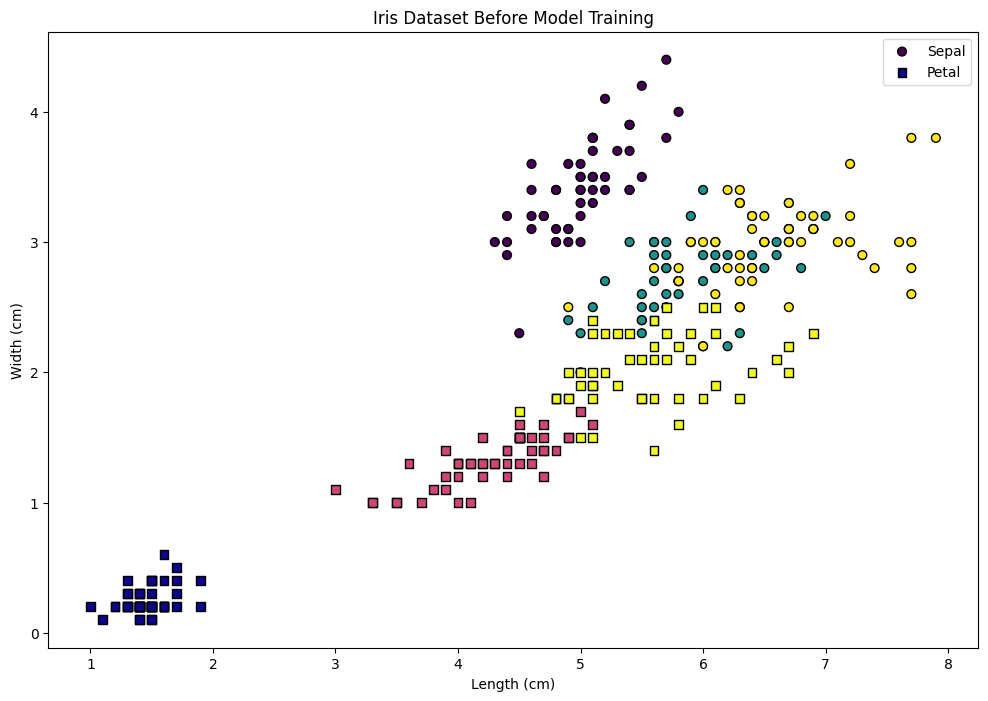

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40, label='Sepal')
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='plasma', edgecolor='k', s=40, marker='s', label='Petal')
plt.title('Iris Dataset Before Model Training')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.legend()
plt.show()

#Split the dataset using training and testing dataset

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Train a k-nearest neighbors classifier

In [ ]:
 knn = KNeighborsClassifier(n_neighbors=3)
 knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

Make prediction on test data

In [ ]:
y_pred = knn.predict(X_test_std)

Evaluate model accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 100.00%


Visualize the decision boundaries after training the model

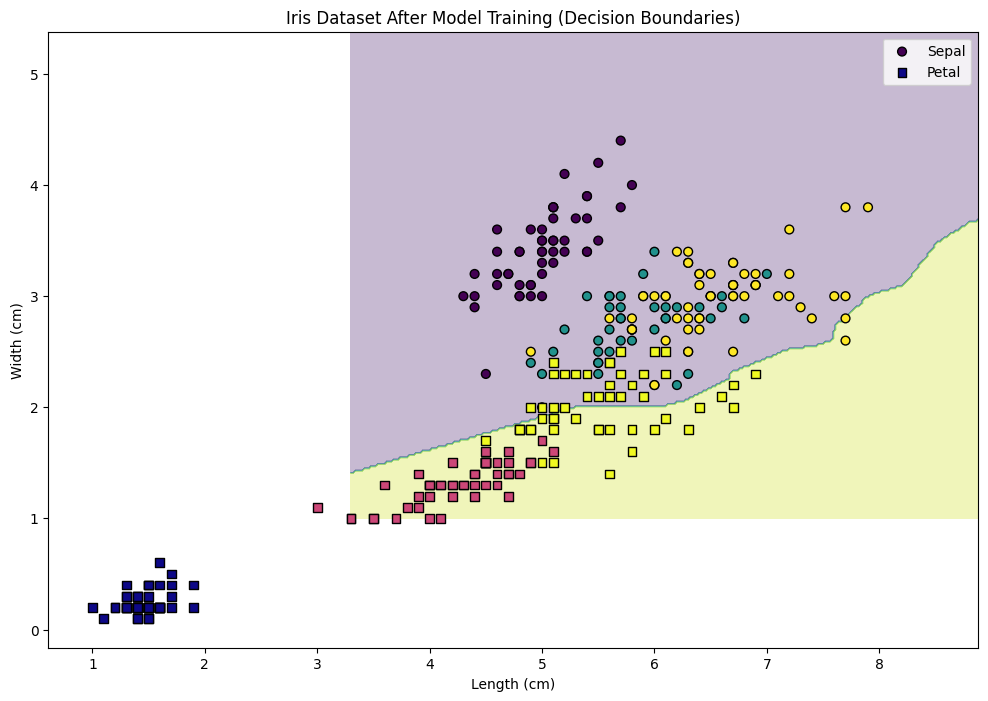

In [ ]:

h = 0.02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40, label='Sepal')
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='plasma', edgecolor='k', s=40, marker='s', label='Petal')

plt.title('Iris Dataset After Model Training (Decision Boundaries)')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.legend()

plt.show()